# Sentiment Analysis

# 1. Imports

In [ ]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#comparison analysis metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
sns.set_context('poster', font_scale=0.5)

# 2. Data

In [2]:
#loading the review dataset
review = pd.read_csv('C:/Users/Anagha/Downloads/cleaned_review_food_neo4j.csv')

In [3]:
#filtering out the stars and text columns
reviews = review[['text', 'stars']].reset_index().drop(columns='index')

In [4]:
print(reviews.shape)
reviews.head()

(330434, 2)


,text,stars
0,My boyfriend and I tried this deli for the fir...,5.0
1,Very impressed with this place! The food was a...,5.0
2,This is the best location EVER. The donuts are...,5.0
3,I will not return to this location. I contacte...,1.0
4,This place just opened up near rivers edge apa...,5.0


# 3. Sentiment Analysis

<Axes: title={'center': 'Number of values per rating'}, ylabel='stars'>

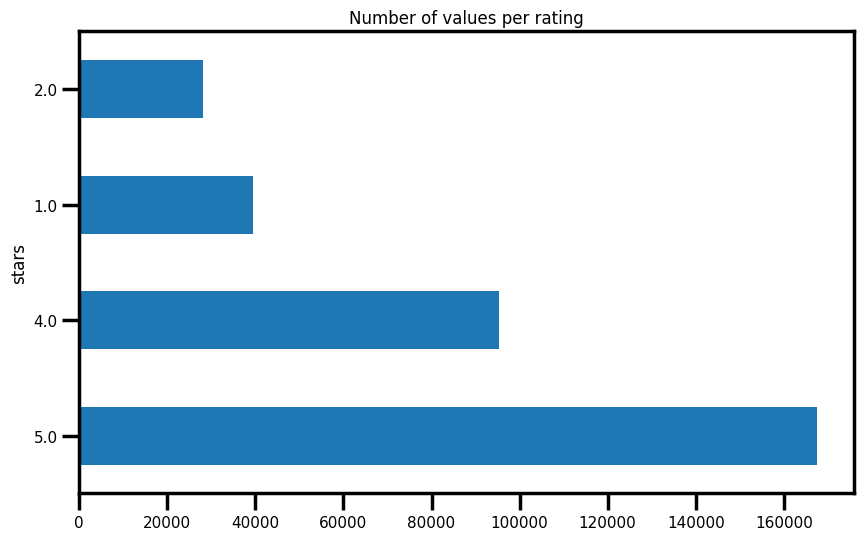

In [5]:
#number of values per star rating
reviews['stars'].value_counts().plot.barh(figsize = (10,6), title = 'Number of values per rating')

## 3.1 Testing VADER with a random review

In [6]:
#creating an object from the VADER
rid = SentimentIntensityAnalyzer()

**Test 1**

In [7]:
test_rid_scores = rid.polarity_scores(reviews.loc[6543]['text'])
test_target_star = reviews.loc[6543]['stars']

print('VADER polarity score: ', test_rid_scores)
print('Actual target star: ', test_target_star)
print('Actual review text:', reviews.text[6543])

VADER polarity score:  {'neg': 0.054, 'neu': 0.835, 'pos': 0.112, 'compound': 0.4337}
Actual target star:  5.0
Actual review text: We have decided to try all the gourmet pizzas! So far we have had: Grandmas Pizza 5 Four Cheese 5 Philly Steak and Cheese 4.5  (I personally dont care for red onions) Chicken Alfredo 4  (this would probably taste better fresh out of their over pipping hot)


**Test 2**

In [8]:
test2_rid_scores = rid.polarity_scores(reviews.loc[183761]['text'])
test2_target_star = reviews.loc[183761]['stars']

print('VADER polarity score: ', test2_rid_scores)
print('Actual target star: ', test2_target_star)
print('Actual review text:', reviews.text[183761])

VADER polarity score:  {'neg': 0.033, 'neu': 0.849, 'pos': 0.118, 'compound': 0.9098}
Actual target star:  5.0
Actual review text: Stopped in for the first time on Superbowl Sunday to have a healthy breakfast, since I may be eating some unhealthy food later today for the big game.  It is bright and clean inside, with plenty of room for social distancing. Right now there is just standing room and some benches inside. The menu has everything from smoothies, juices, acai bowls to power potions and energy bites to even salads. They do have a rewards program. You get $2 off your first purchase when you enroll. Simply enter your phone number and you will get a text to finish filling out information. Youll get 1pt for every $1 spent. The next reward is $6 off when you get to 150pts.  We got the the Peanut Acai Bowl and the Choco Acai Bowl. Both had quality toppings and were filling. Im looking forward to trying more on the menu!


**Test 3**

In [9]:
test3_rid_scores = rid.polarity_scores(reviews.loc[92701]['text'])
test3_target_star = reviews.loc[92701]['stars']

print('VADER polarity score: ', test3_rid_scores)
print('Actual target star: ', test3_target_star)
print('Actual review text:', reviews.text[92701])

VADER polarity score:  {'neg': 0.013, 'neu': 0.887, 'pos': 0.099, 'compound': 0.9047}
Actual target star:  4.0
Actual review text: Best breakfast bagel Ive had. So simple yet so good. Only giving it 4 stars because its chaos in there. If you order online and you dont remind them 3 times of your order number, itll sit on the counter until youre the last one in there waiting for it to be called out. (40 minutes)   They need a better take out system, an organized take out system, instead of taking 100 orders at once, they need to slow down and take a breath. Also, I will mention that during the height of covid it was still rather busy and they didnt regulate how many people could stand inside this tiny building... so you had at least 20 people standing in there at any given time and if youve ever driven past or been inside this place... you already know what Im talking about. Packed like sardines. Just an ode to how good they are but they definitely need a stern voice in there to command 

## 3.2 Computing polarity scores using compound scores

In [10]:
reviews['label'] = reviews['stars'].apply(
    lambda s: 'positive' if s > 3 else 'negative'
)

In [11]:
#creating columns in the dataframe that contain relevant data from the polarity scores
reviews['polarity_scores'] = reviews['text'].apply(lambda text: rid.polarity_scores(str(text)))
reviews['compound_score']  = reviews['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
reviews['compound_label'] = reviews['compound_score'].apply(
    lambda s: 'positive' if s > 0 else 'negative'
)
reviews.head()

CPU times: total: 3min 48s
Wall time: 3min 50s


,text,stars,label,polarity_scores,compound_score,compound_label
0,My boyfriend and I tried this deli for the fir...,5.0,positive,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.9168,positive
1,Very impressed with this place! The food was a...,5.0,positive,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.9519,positive
2,This is the best location EVER. The donuts are...,5.0,positive,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9153,positive
3,I will not return to this location. I contacte...,1.0,negative,"{'neg': 0.044, 'neu': 0.879, 'pos': 0.077, 'co...",0.4323,positive
4,This place just opened up near rivers edge apa...,5.0,positive,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.9816,positive


## 3.3 Comparison Analysis of compound score and original label

In [12]:
print('Accuracy score: ', accuracy_score(reviews.label, reviews.compound_label))

Accuracy score:  0.8900022394789883


In [13]:
print('Classification Report:\n', classification_report(reviews.label, reviews.compound_label))

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.54      0.67     67576
    positive       0.89      0.98      0.93    262858

    accuracy                           0.89    330434
   macro avg       0.88      0.76      0.80    330434
weighted avg       0.89      0.89      0.88    330434



In [14]:
print(confusion_matrix(reviews.label, reviews.compound_label))

[[ 36344  31232]
 [  5115 257743]]


<function matplotlib.pyplot.show(close=None, block=None)>

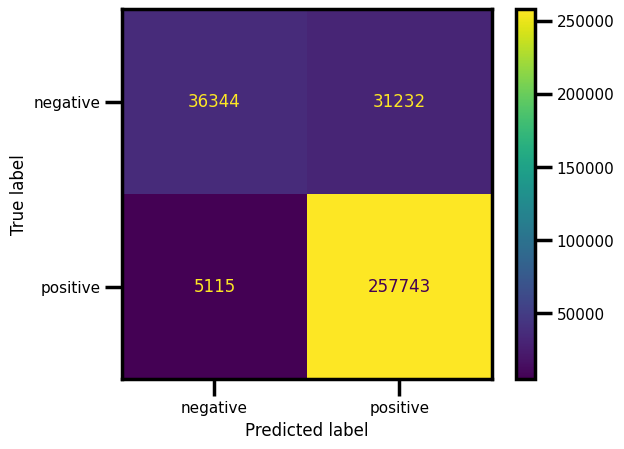

In [15]:
disp = ConfusionMatrixDisplay(
    confusion_matrix(reviews.label, reviews.compound_label),
    display_labels=['negative', 'positive']
)
disp.plot()
plt.show